# 0. Import Library

In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5439267787609318655
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2252026676
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9147180890636471426
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

# 1. Get the Data
#### The data came from https://www.kaggle.com/anthonypino/melbourne-housing-market

### 1.01 Read the data from csv file

In [320]:
df = pd.read_csv('https://raw.githubusercontent.com/adeirman46/Melbourne-Housing/main/Melbourne_housing_FULL.csv')

# 2. Data Exploration
**Some Key Details**

`Suburb`: Suburb

`Address`: Address

`Rooms`: Number of rooms

`Price`: Price in Australian dollars

`Method`:
* S - property sold;
* SP - property sold prior;
* PI - property passed in;
* PN - sold prior not disclosed;
* SN - sold not disclosed;
* NB - no bid;
* VB - vendor bid;
* W - withdrawn prior to auction;
* SA - sold after auction;
* SS - sold after auction price not disclosed.

`Type`:
* h - house
* u - unit apartment
* t - townhouse

`SellerG`: Real Estate Agent

`Date`: Date sold

`Distance`: Distance from CBD (Central Business District) in Kilometres

`Regionname`: General Region (West, North West, North, North east …etc)

`Propertycount`: Number of properties that exist in the suburb.

`Bedroom2` : Number of Bedrooms

`Bathroom`: Number of Bathrooms

`Car`: Number of carspots

`Landsize`: Land Size in Metres

`BuildingArea`: Building Size in Metres

`YearBuilt`: Year the house was built

`CouncilArea`: Governing council for the area

`Lattitude`: Lattitude

`Longtitude`: Longtitude

## 2.0 Skim Our Data
**Briefly overview about our data look like**

### 2.01 Preview first 5 data

In [321]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


### 2.02 Data Information

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### 2.03 Missing Data

In [323]:
df.isnull().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### 2.04 Data Summary

In [324]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


### 2.05 Data Correlation

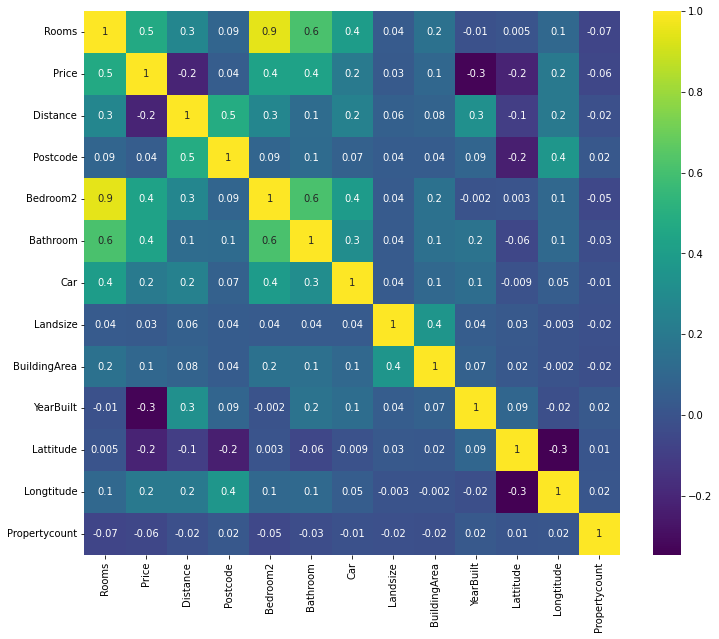

In [325]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.0g');

## 2.1 Suburb

### 2.11 Value Counts

In [326]:
df.Suburb.value_counts()

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: Suburb, Length: 351, dtype: int64

#### Mean

In [327]:
df.Suburb.value_counts().mean() # Rata-rata rumah yang dijual tiap pinggiran kota adalah 99 rumah

99.3076923076923

#### Percentile

In [328]:
np.percentile(df.Suburb.value_counts(), q=25) # Kuartil 1 = 16 rumah

16.0

In [329]:
np.percentile(df.Suburb.value_counts(), q=50) # Kuartil 2 (median) =  55 rumah

55.0

In [330]:
np.percentile(df.Suburb.value_counts(), q=75) # Kuartil 3 = 135 rumah

135.5

### 2.12 Correlation with Price

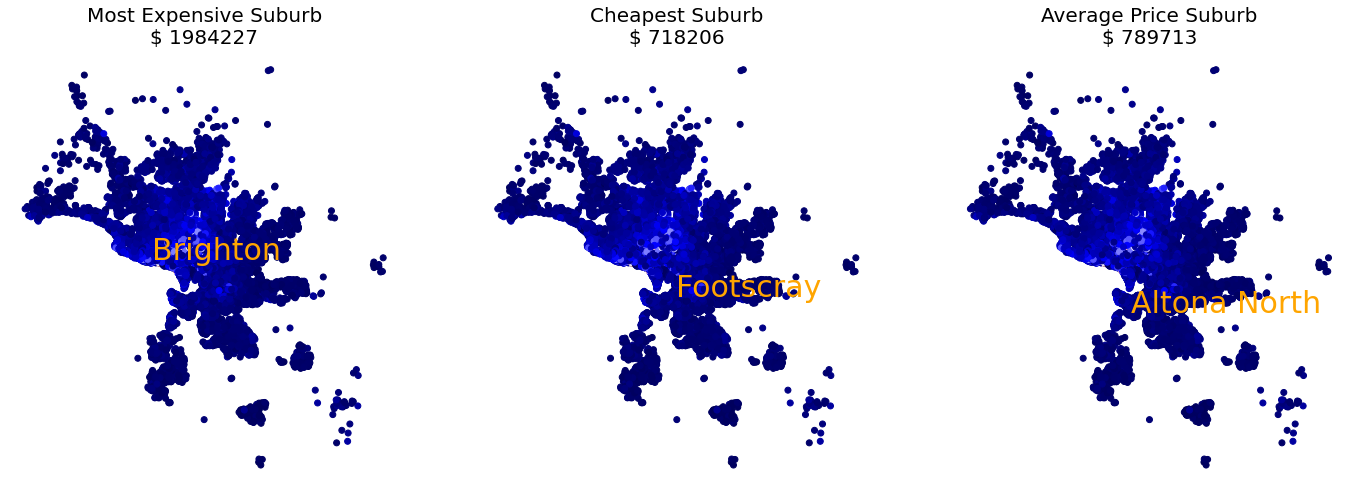

In [331]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

ax1.scatter(df['Lattitude'], df['Longtitude'], c=df['Price'], cmap='seismic');
place = (df.Suburb[df['Price'] == df['Price'].max()]).to_list()[0]
ax1.text(df.Lattitude[df['Suburb'] == place].mean(), df.Longtitude[df['Suburb'] == place].mean(), f'{place}', fontsize=30, c='orange')
ax1.set_title(f"""Most Expensive Suburb
$ {df.Price[df['Suburb'] == 'Brighton'].mean():.0f}""", fontsize=20)
ax1.axis('off');

ax2.scatter(df['Lattitude'], df['Longtitude'], c=df['Price'], cmap='seismic');
place = (df.Suburb[df['Price'] == df['Price'].min()]).to_list()[0]
ax2.text(df.Lattitude[df['Suburb'] == place].mean(), df.Longtitude[df['Suburb'] == place].mean(), f'{place}', fontsize=30, c='orange')
ax2.set_title(f"""Cheapest Suburb
$ {df.Price[df['Suburb'] == 'Footscray'].mean():.0f}""", fontsize=20)
ax2.axis('off');

ax3.scatter(df['Lattitude'], df['Longtitude'], c=df['Price'], cmap='seismic');
place = (df.Suburb[df['Price'] == df['Price'].median()]).to_list()[0]
ax3.text(df.Lattitude[df['Suburb'] == place].mean(), df.Longtitude[df['Suburb'] == place].mean(), f'{place}', fontsize=30, c='orange')
ax3.set_title(f"""Average Price Suburb
$ {df.Price[df['Suburb'] == 'Altona North'].mean():.0f}""", fontsize=20)
ax3.axis('off');

### 2.13 Plot Distribution

#### Horizontal Bar

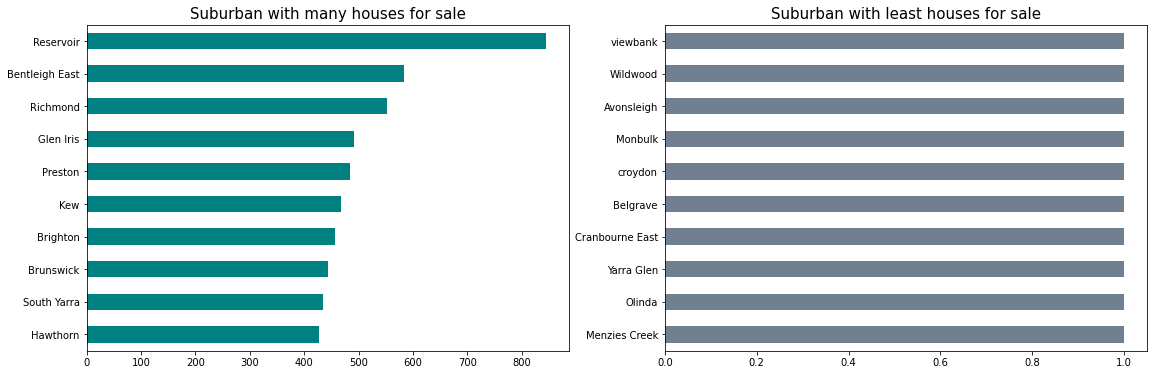

In [332]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df.Suburb.value_counts()[:10][::-1].plot(kind='barh', color='teal', ax=ax1)
ax1.set_title('Suburban with many houses for sale',  fontsize=15);

df.Suburb.value_counts()[-10:][::-1].plot(kind='barh', color='slategray', ax=ax2)
ax2.set_title('Suburban with least houses for sale', fontsize=15);

#### Histogram

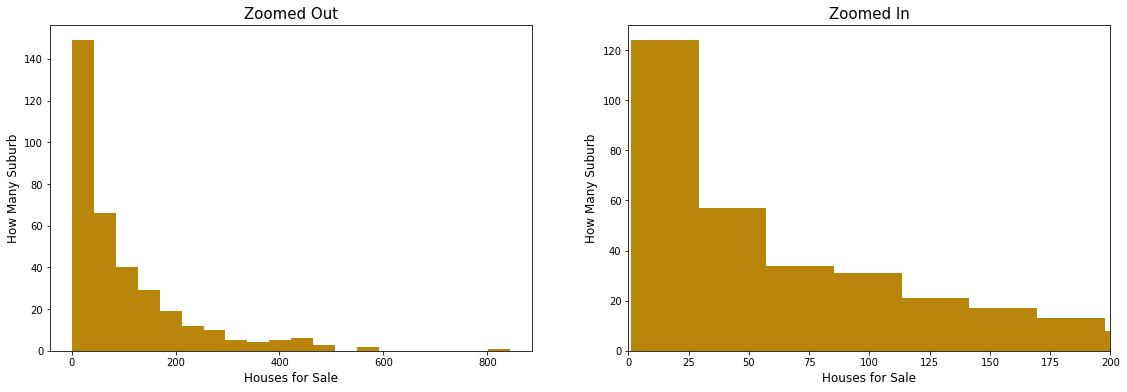

In [333]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df.Suburb.value_counts().plot(kind='hist', bins=20, color='darkgoldenrod', ax=ax1);
ax1.set_title('Zoomed Out', fontsize=15)
ax1.set_xlabel('Houses for Sale', fontsize=12);
ax1.set_ylabel('How Many Suburb', fontsize=12);

df.Suburb.value_counts().plot(kind='hist', bins=30, color='darkgoldenrod', ax=ax2)
ax2.set_xlim(0, 200)
ax2.set_title('Zoomed In', fontsize=15)
ax2.set_xlabel('Houses for Sale', fontsize=12)
ax2.set_ylabel('How Many Suburb', fontsize=12);

## 2.2 Address

### 2.21 Value Counts

In [334]:
df.Address.value_counts()

5 Charles St        6
25 William St       4
57 Bay Rd           3
5 Margaret St       3
16 Smith St         3
                   ..
17 Fraser St        1
11a Bewdley St      1
6/13 Ulupna Rd      1
428 North Rd        1
3 Tarrengower St    1
Name: Address, Length: 34009, dtype: int64

#### Mean

In [335]:
df.Address.value_counts().mean() # Rata-rata terjual 1 rumah setiap alamat

1.0249345761416095

#### Percentile

In [336]:
np.percentile(df.Address.value_counts(), q=25) # Kuartil 1 =  1 rumah

1.0

In [337]:
np.percentile(df.Address.value_counts(), q=50) # Kuartil 2 (median) =  1 rumah

1.0

In [338]:
np.percentile(df.Address.value_counts(), q=75) # Kuartil 3 = 1 rumah

1.0

### 2.22 Plot Distribution

#### Horizontal Plot Bar

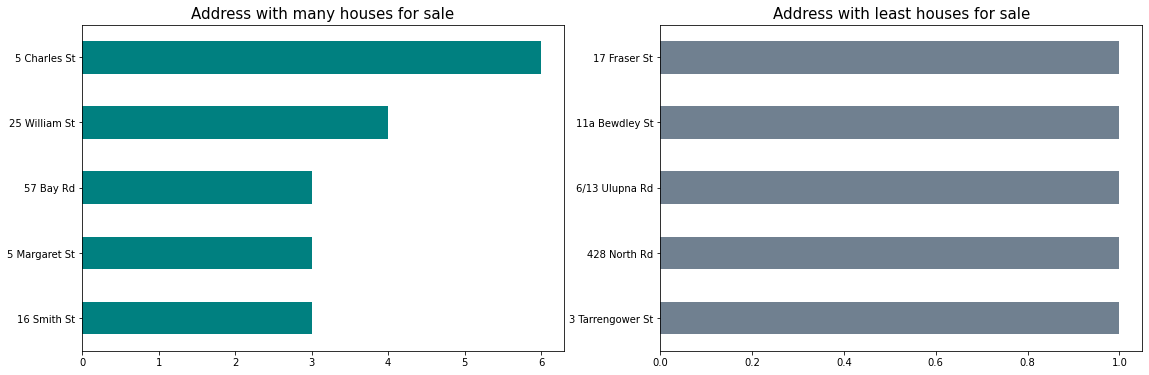

In [339]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df.Address.value_counts()[:5][::-1].plot(kind='barh', color='teal', ax=ax1)
ax1.set_title('Address with many houses for sale', fontsize=15);

df.Address.value_counts()[-5:][::-1].plot(kind='barh', color='slategray', ax=ax2)
ax2.set_title('Address with least houses for sale', fontsize=15);

#### Histogram

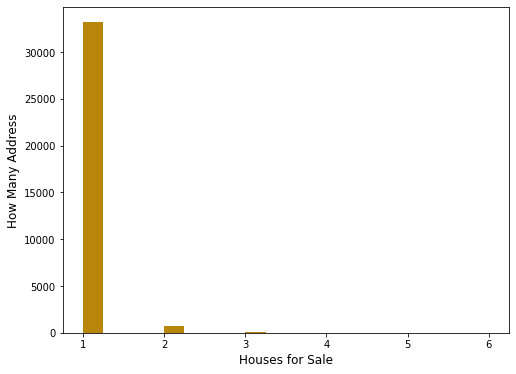

In [340]:
plt.figure(figsize=(8, 6))

df.Address.value_counts().plot(kind='hist', bins=20, color='darkgoldenrod')

plt.xlabel('Houses for Sale', fontsize=12)
plt.ylabel('How Many Address', fontsize=12);

## 2.3 Rooms

### 2.31 Value Counts

In [434]:
df.Rooms.value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

### 2.32 Remove Unnecessary Feature

In [436]:
r3 = df[df.Rooms == 3]
r2 = df[df.Rooms == 2]
r4 = df[df.Rooms == 4]
r5 = df[df.Rooms == 5]
r1 = df[df.Rooms == 1]

df = r3.append((r2, r4, r5, r1))

In [455]:
df.Rooms.value_counts()

3    15084
2     8332
4     7956
5     1737
1     1479
Name: Rooms, dtype: int64

In [456]:
df.Rooms.isnull().sum()

0

### 2.33 Correlation with Price

#### Heatmap

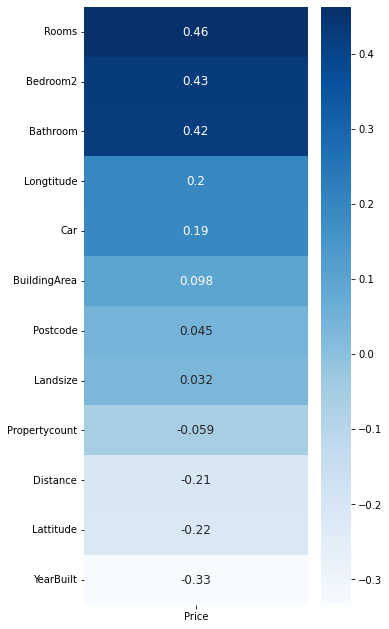

In [438]:
plt.figure(figsize=(5, 11))
sns.heatmap(pd.DataFrame(data={'Price': df.corr().loc['Price']}).sort_values(ascending=False, by='Price')[1:], cmap='Blues', annot=True, annot_kws={'size':12});

#### Scatter

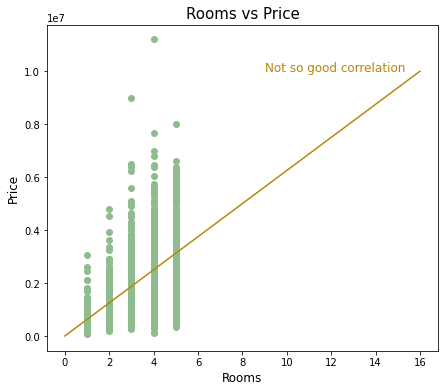

In [439]:
plt.figure(figsize=(7, 6))
x = np.linspace(0, 16)
y = np.linspace(0, 1e7)
plt.plot(x, y, c='darkgoldenrod')
plt.scatter(df['Rooms'], df['Price'], color='darkseagreen')
plt.title('Rooms vs Price', fontsize=15)
plt.xlabel('Rooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.text(9, 1e7, 'Not so good correlation', fontsize=12, color='darkgoldenrod');

### 2.33 Plot Distribution

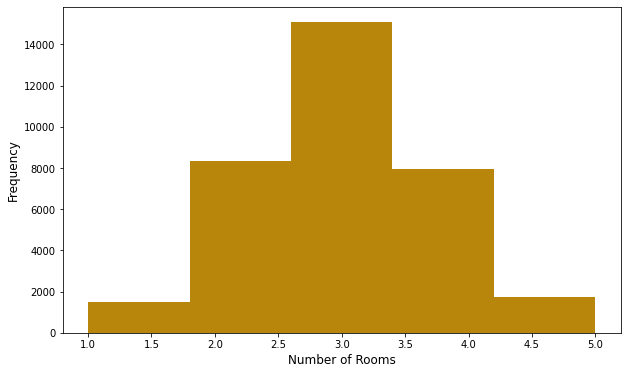

In [442]:
df['Rooms'].plot(kind='hist', bins=5, figsize=(10, 6), color='darkgoldenrod')
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

## 2.4 Type

### 2.41 Value Counts

In [443]:
df['Type'].value_counts()

h    23719
u     7291
t     3578
Name: Type, dtype: int64

### 2.42 Correlation with Price

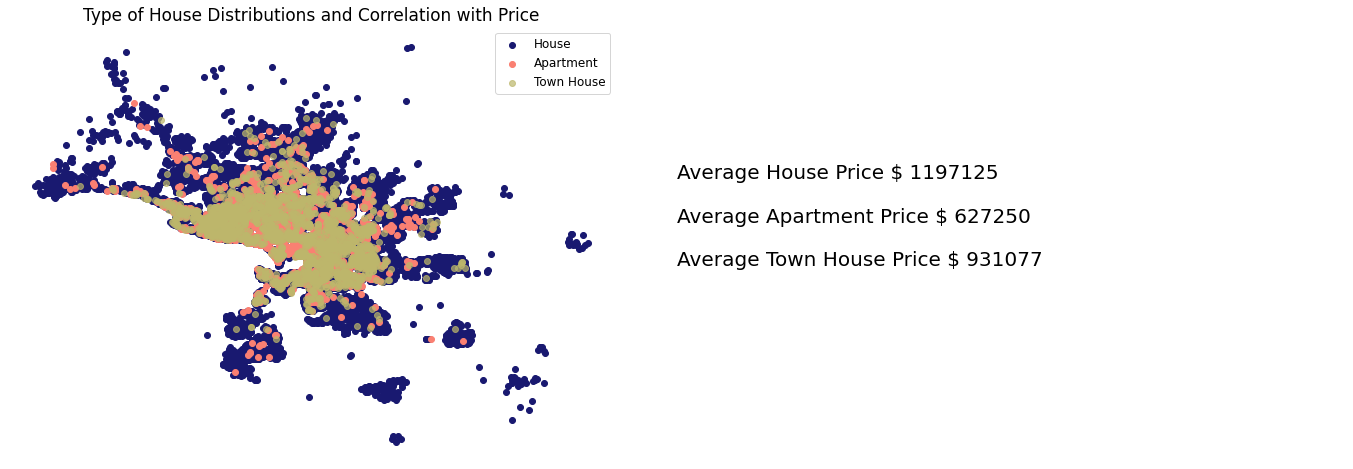

In [444]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 8), gridspec_kw={'width_ratios':[1, 1]})

ax1.scatter(df.Lattitude[df['Type']=='h'], df.Longtitude[df['Type']=='h'], c='midnightblue', label='House')
ax1.scatter(df.Lattitude[df['Type']=='u'], df.Longtitude[df['Type']=='u'], c='salmon', label='Apartment')
ax1.scatter(df.Lattitude[df['Type']=='t'], df.Longtitude[df['Type']=='t'], c='darkkhaki', label='Town House', alpha=0.7)
ax1.legend(fontsize=12)
ax1.set_title('Type of House Distributions and Correlation with Price', fontsize=17)
ax1.axis('off');

avg_price_house = df.Price[df['Type']=='h'].mean()
avg_price_apartment = df.Price[df['Type']=='u'].mean()
avg_price_townhouse = df.Price[df['Type']=='t'].mean()

ax2.text(-0.1, 0.65, f'Average House Price $ {avg_price_house:.0f}', fontsize=20)
ax2.text(-0.1, 0.55, f'Average Apartment Price $ {avg_price_apartment:.0f}', fontsize=20)
ax2.text(-0.1, 0.45, f'Average Town House Price $ {avg_price_townhouse:.0f}', fontsize=20)
ax2.axis('off');

### 2.43 Plot Distribution

#### Horizontal Bar

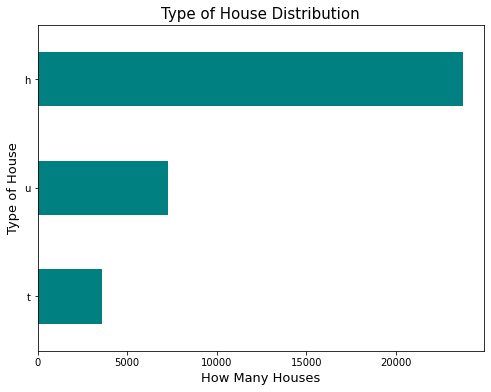

In [445]:
df['Type'].value_counts()[::-1].plot(kind='barh', color='teal', figsize=(8,6));
plt.title('Type of House Distribution', fontsize=15)
plt.xlabel('How Many Houses', fontsize=13)
plt.ylabel('Type of House', fontsize=13);

## 2.5 Price

In [446]:
df.isnull().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7521
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8179
Bathroom          8188
Car               8686
Landsize         11736
BuildingArea     20969
YearBuilt        19170
CouncilArea          3
Lattitude         7944
Longtitude        7944
Regionname           3
Propertycount        3
dtype: int64

### 2.51 Value Counts

In [447]:
df.Price.value_counts()

600000.00     235
1100000.00    234
650000.00     218
800000.00     217
1300000.00    207
             ... 
1203500.00      1
1091500.00      1
566100.00       1
553100.00       1
504500.00       1
Name: Price, Length: 2861, dtype: int64

#### Mean

In [448]:
df.Price.mean()

1044608.0324380242

#### Max

In [449]:
df.Price.max()

11200000.0

#### Min

In [450]:
df.Price.min()

85000.0

### 2.52 Plot Distribution

#### Box Plot

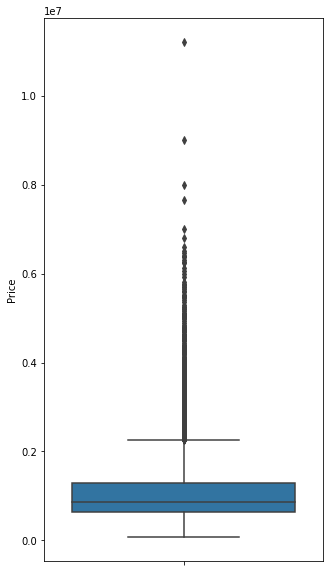

In [451]:
# Skala harga dalam grafik adalah 10 juta dolar

plt.figure(figsize=(5, 10))
sns.boxplot(y = df['Price']);

#### **Max = Q3 + 1.5 (Q3 - Q1)**

#### **Min = Q1 - 1.5 (Q3 - Q1)**

In [452]:
q1 = np.percentile(df.Price.to_numpy(na_value=0), q=25)
q3 = np.percentile(df.Price.to_numpy(na_value=0), q=75)

print(f'Max : {q3 + 1.5*(q3-q1)}, Min: {q1 - 1.5*(q3-q1)}')

Max : 2275000.0, Min: -725000.0


#### Karena harga pasti positif, maka nilai minimumnya kita set menjadi $0

### 2.53 Remove Outliers

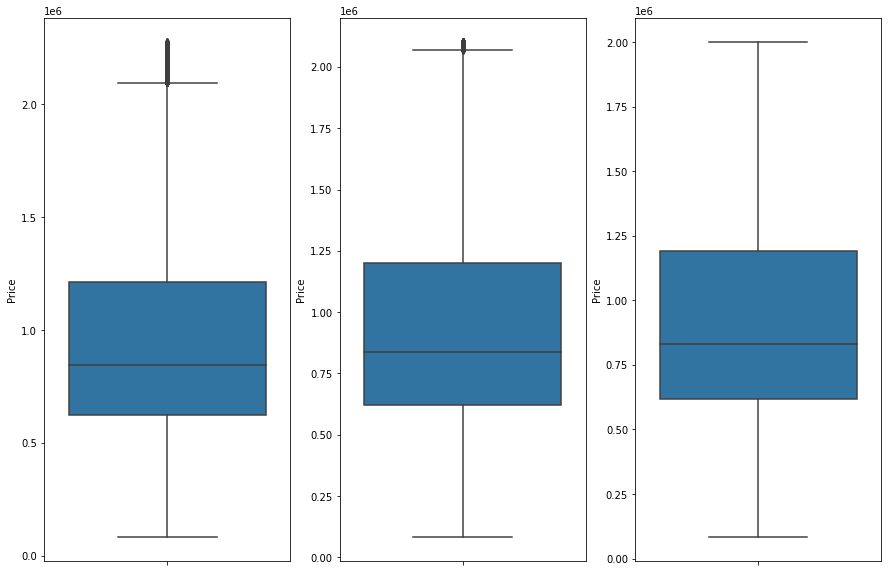

In [457]:
# Skala harga dalam grafik adalah 10 juta dolar

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

sns.boxplot(y = df.Price[df['Price']<=2275000], ax=ax1);
sns.boxplot(y = df.Price[df['Price']<=2100000], ax=ax2);
sns.boxplot(y = df.Price[df['Price']<=2000000], ax=ax3);

### 2.54 Why Remove Outlier First? Why Not Just Input Values?

In [458]:
hundred = np.ones(shape=(1000))*100
hundred[:10]

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [459]:
hundred = np.append(hundred, values=(1000000)) # the 1000.000 is an outlier

In [460]:
hundred.mean() # nilai 

1098.901098901099

### 2.55 Input Missing Values

#### Buat dataframe baru yang tidak mengikutsertakan outlier

In [461]:
df_new = df[df['Price']<=2000000]

In [462]:
df_new.Price.isnull().sum(axis=0)

0

In [463]:
len(df_new)

25259

#### Karena kita lihat bahwa sortiran kita (<2000.000) tidak mengikutsertakan null values maka kita akan buat data frame khusus ketika harganya berupa null values

In [464]:
df_price_null = df[df.Price.isnull()]

#### Nilai yang kita buang (outlier) ada 1866

In [465]:
len(df) - (len(df_new) + len(df_price_null))

1808

#### Buat dataframe final

In [466]:
df2 = df_new.append(df_price_null)

In [467]:
df2.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7521
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7919
Bathroom          7926
Car               8403
Landsize         11298
BuildingArea     20014
YearBuilt        18307
CouncilArea          3
Lattitude         7693
Longtitude        7693
Regionname           3
Propertycount        3
dtype: int64

#### Karena sudah tidak ada outlier maka kita bisa ganti nilai kosong dengan mean (rata-rata)

In [468]:
df2.Rooms.value_counts()

3    14615
2     8285
4     7063
1     1474
5     1343
Name: Rooms, dtype: int64

In [473]:
df2.Price[df2.Rooms == 5].mean()

1240665.6036809816

In [474]:
# fungsi untuk mengisi "price" kosong
def impute_price(cols):
    Price = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Price):
        if Rooms == 1:
            return 424361.8648194794
        elif Rooms == 2:
            return 746976.3787833828
        elif Rooms == 3:
            return 966072.8982416434
        elif Rooms == 4:
            return 1124358.0382089552
        elif Rooms == 5:
            return 1240665.6036809816
            
    else:
        return Price

#### Apply Method

In [475]:
df2['Price'] = df2[['Price','Rooms']].apply(impute_price,axis=1)

In [476]:
df2.Price.isnull().sum(axis=0)

0

### 2.56 Plot New Distribution

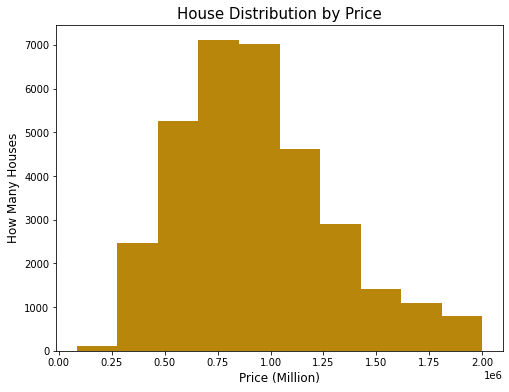

In [477]:
df2.Price.plot(kind='hist', figsize=(8,6), color='darkgoldenrod')
plt.title('House Distribution by Price', fontsize=15)
plt.xlabel('Price (Million)', fontsize=12)
plt.ylabel('How Many Houses', fontsize=12);

## 2.6 Method

In [478]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,2.00,0.00,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
15,Abbotsford,217 Langridge St,3,h,1000000.00,S,Jellis,8/10/2016,2.50,3067.00,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.00
24,Abbotsford,40 Nicholson St,3,h,1350000.00,VB,Nelson,12/11/2016,2.50,3067.00,...,2.00,2.00,214.00,190.00,2005.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00


### 2.61 Value Counts

In [479]:
df2.Method.value_counts()

S     18529
SP     4964
PI     4497
VB     2763
SN     1303
PN      303
SA      215
W       170
SS       36
Name: Method, dtype: int64

`Method`:
* S - property sold
* SP - property sold prior
* PI - property passed in
* PN - sold prior not disclosed
* SN - sold not disclosed
* VB - vendor bid
* W - withdrawn prior to auction
* SA - sold after auction
* SS - sold after auction price not disclosed

In [480]:
df2.Method.isnull().sum(axis=0)

0

### 2.62 Plot Distribution and Correlation with Price

In [481]:
avg_price_s = df2.Price[df.Method == 'S'].mean()
avg_price_sp = df2.Price[df.Method == 'SP'].mean()
avg_price_pi = df2.Price[df.Method == 'PI'].mean()
avg_price_vb = df2.Price[df.Method == 'VB'].mean()
avg_price_sn = df2.Price[df.Method == 'SN'].mean()
avg_price_pn = df2.Price[df.Method == 'PN'].mean()
avg_price_sa = df2.Price[df.Method == 'SA'].mean()
avg_price_w = df2.Price[df.Method == 'W'].mean()
avg_price_ss = df2.Price[df.Method == 'SS'].mean()

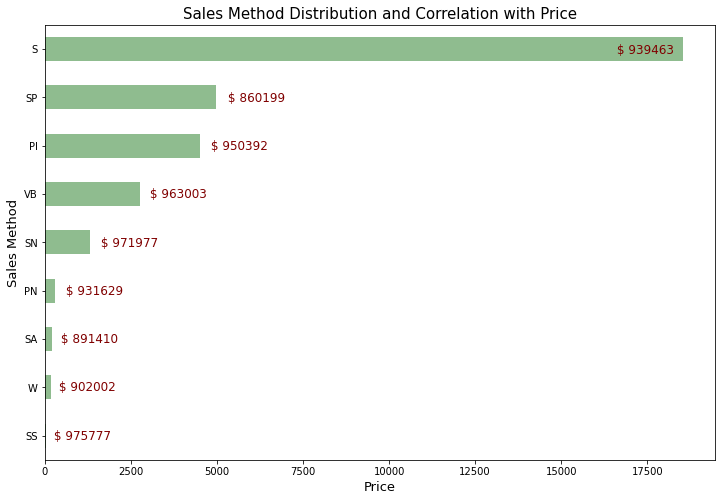

In [482]:
df2.Method.value_counts()[::-1].plot(kind='barh', figsize=(12, 8), color='darkseagreen');
plt.text(16500, 7.9, f' $ {avg_price_s:.0f}', color='maroon', fontsize=12)
plt.text(5200, 6.92, f' $ {avg_price_sp:.0f}', color='maroon', fontsize=12)
plt.text(4700, 5.92, f' $ {avg_price_pi:.0f}', color='maroon', fontsize=12)
plt.text(2950, 4.92, f' $ {avg_price_vb:.0f}', color='maroon', fontsize=12)
plt.text(1500, 3.92, f' $ {avg_price_sn:.0f}', color='maroon', fontsize=12)
plt.text(500, 2.92, f' $ {avg_price_pn:.0f}', color='maroon', fontsize=12)
plt.text(350, 1.92, f' $ {avg_price_sa:.0f}', color='maroon', fontsize=12)
plt.text(300, 0.92, f' $ {avg_price_w:.0f}', color='maroon', fontsize=12)
plt.text(150, -0.08, f' $ {avg_price_ss:.0f}', color='maroon', fontsize=12)
plt.title('Sales Method Distribution and Correlation with Price', fontsize=15)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Sales Method', fontsize=13);

## 2.7 Seller G

### 2.71 Value Counts

In [483]:
df2.SellerG.value_counts()

Barry                   3193
Nelson                  3125
Jellis                  2979
hockingstuart           2534
Ray                     1911
                        ... 
Rosin                      1
Oak                        1
Luxe                       1
Steveway                   1
hockingstuart/Cayzer       1
Name: SellerG, Length: 381, dtype: int64

### 2.72 Correlation with Price

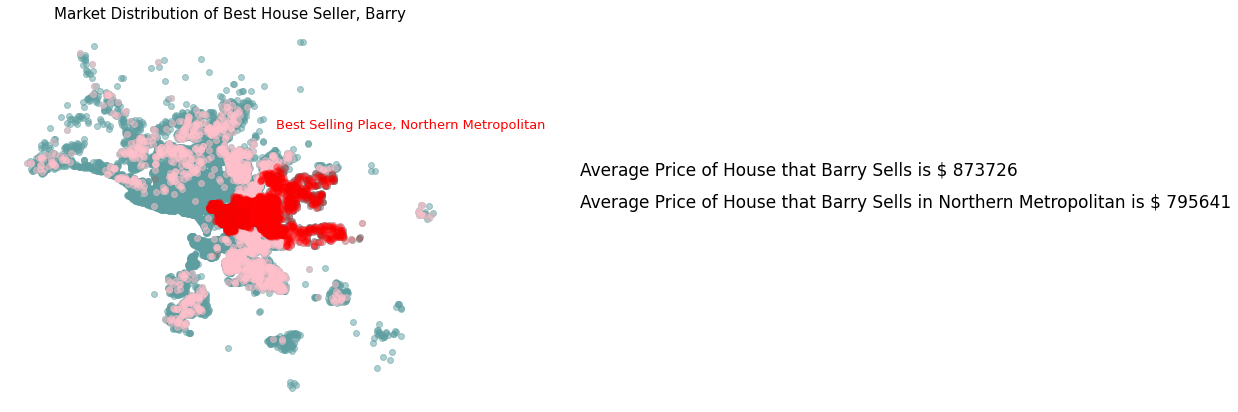

In [484]:
plt.figure(figsize=(8, 7))
plt.scatter(df2.Lattitude, df2.Longtitude, color='cadetblue', alpha=0.5)
plt.scatter(df2.Lattitude[df2.SellerG == 'Barry'], df2.Longtitude[df2.SellerG == 'Barry'], color='pink', alpha=0.5)
plt.scatter(df2.Lattitude[df2.Regionname == 'Northern Metropolitan'], df2.Longtitude[df2.Regionname == 'Northern Metropolitan'], color='red', alpha=0.1)
barry_avg_price = df2.Price[df.SellerG == 'Barry'].mean()
barry_northern_avg_price = df2.Price[(df.SellerG == 'Barry') & (df2.Regionname == 'Northern Metropolitan')].mean()
plt.text(-37.1, 145.1,  f'Average Price of House that Barry Sells is $ {barry_avg_price:.0f}', fontsize=17);
plt.text(-37.1, 145,  f'Average Price of House that Barry Sells in Northern Metropolitan is $ {barry_northern_avg_price:.0f}', fontsize=17);
plt.text(-37.7, 145.25,  f'Best Selling Place, Northern Metropolitan', fontsize=13, color='red');
plt.axis('off')
plt.title('Market Distribution of Best House Seller, Barry', fontsize=15);

### 2.73 Plot Distribution

#### Histogram

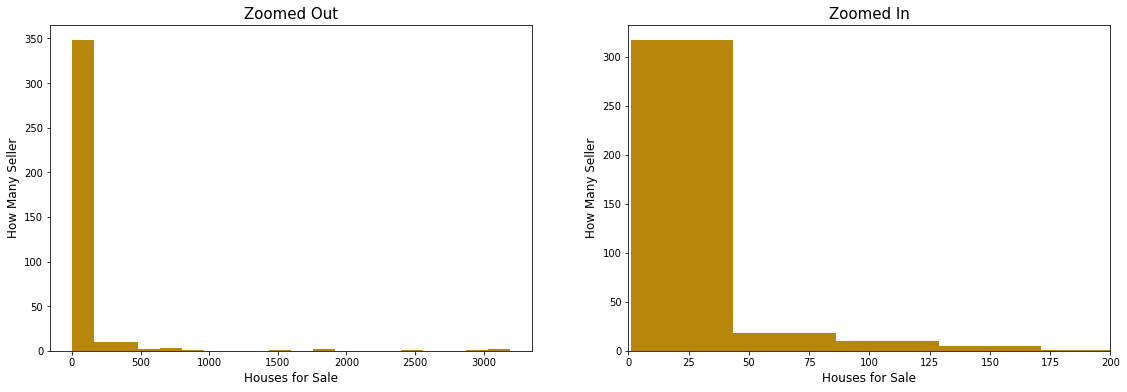

In [485]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df2.SellerG.value_counts().plot(kind='hist', bins=20, color='darkgoldenrod', ax=ax1);
ax1.set_title('Zoomed Out', fontsize=15)
ax1.set_xlabel('Houses for Sale', fontsize=12);
ax1.set_ylabel('How Many Seller', fontsize=12);

df2.SellerG.value_counts().plot(kind='hist', bins=75, color='darkgoldenrod', ax=ax2)
ax2.set_xlim(0, 200)
ax2.set_title('Zoomed In', fontsize=15)
ax2.set_xlabel('Houses for Sale', fontsize=12)
ax2.set_ylabel('How Many Seller', fontsize=12);

#### Horizontal Bar

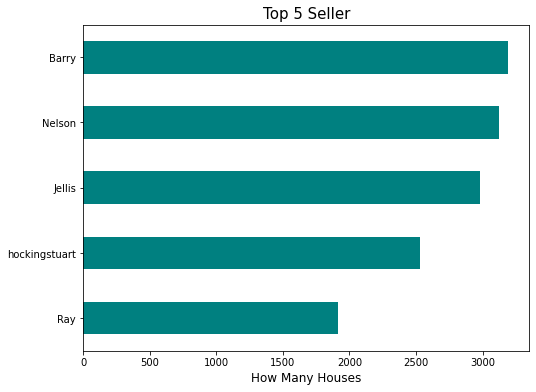

In [487]:
plt.figure(figsize=(8, 6))
df2.SellerG.value_counts()[:5][::-1].plot(kind='barh', color='teal')
plt.title('Top 5 Seller', fontsize=15)
plt.xlabel('How Many Houses', fontsize=12);

## 2.8 Date

### 2.81 Change to DateTime Format

In [488]:
df2.Date.iloc[0] # String Format

'4/03/2017'

In [489]:
df2.Date = pd.to_datetime(df2.Date)

In [490]:
df2.Date.iloc[0] # Date Time Format

Timestamp('2017-04-03 00:00:00')

### 2.82 Extract Year from Date Column

In [491]:
df2['Year'] = df2.Date.dt.year

In [492]:
df2[:2]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-04-03,2.50,3067.00,...,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2017
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,2017-04-03,2.50,3067.00,...,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2017


### 2.83 Value Counts

In [493]:
df2.Year.value_counts()

2017    18699
2016     9621
2018     4460
Name: Year, dtype: int64

### 2.84 Correlation with Price

#### Line Plot

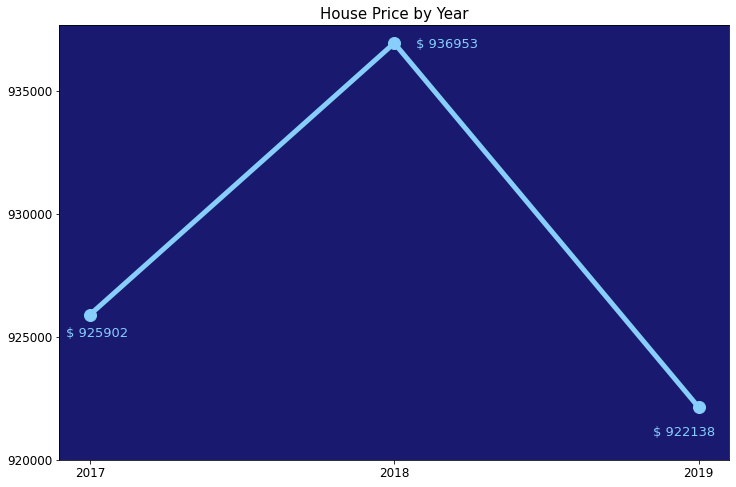

In [523]:
fig, ax = plt.subplots(figsize=(12, 8))

avg_price_2016 = df2.Price[df2.Year == 2016].mean()
avg_price_2017 = df2.Price[df2.Year == 2017].mean()
avg_price_2018 = df2.Price[df2.Year == 2018].mean()

ax.plot([2017, 2018, 2019], [avg_price_2016, avg_price_2017, avg_price_2018], '-o', color='lightskyblue', linewidth=5, markersize=12)
ax.set_xticks(np.arange(2017, 2019+1))
ax.set_facecolor('midnightblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('House Price by Year', fontsize=15)
ax.set_yticks(np.arange(920000, 940000, 5000))
ax.text(2016.92, 925000, f'$ {avg_price_2016:.0f}', color='lightskyblue', fontsize=13)
ax.text(2018.07, 936750, f'$ {avg_price_2017:.0f}', color='lightskyblue', fontsize=13)
ax.text(2018.85, 921000, f'$ {avg_price_2018:.0f}', color='lightskyblue', fontsize=13);

### 2.85 Plot Distribution

#### Scatter Plot

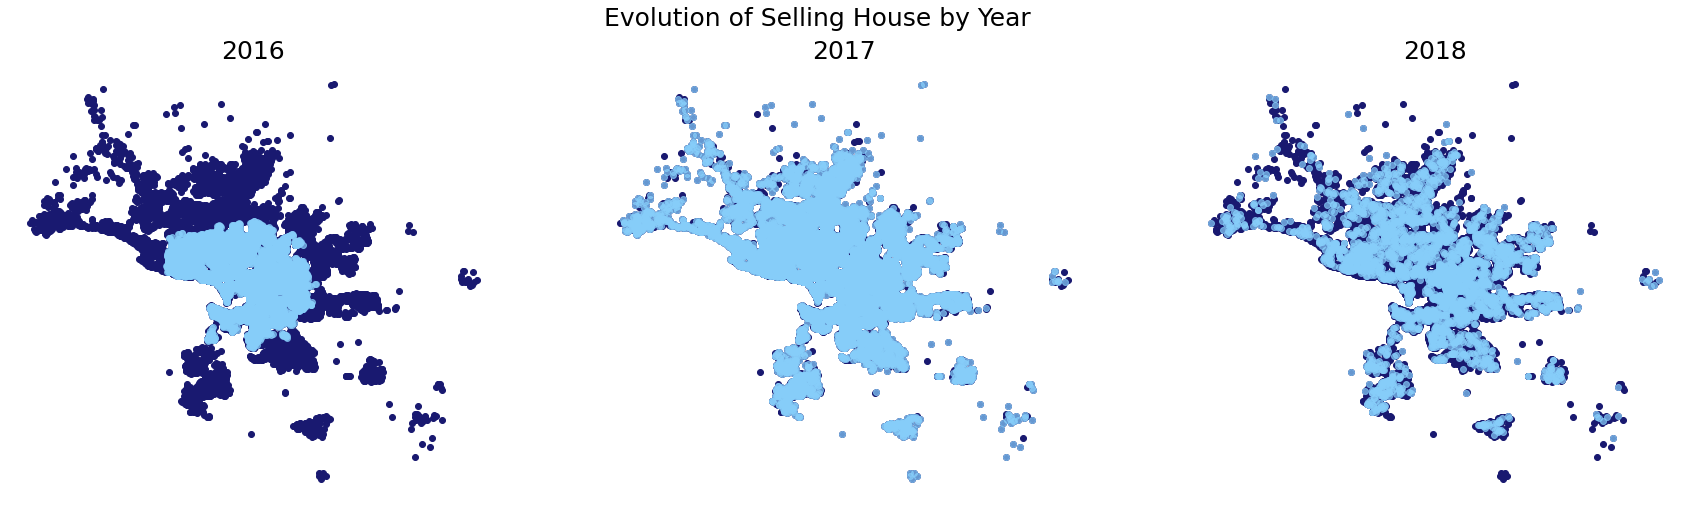

In [524]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

ax1.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax1.scatter(df2.Lattitude[df2.Year == 2016], df2.Longtitude[df2.Year == 2016], color='lightskyblue', alpha=0.7)
ax1.set_title('2016', fontsize=25)
ax1.axis('off')

ax2.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax2.scatter(df2.Lattitude[df2.Year == 2017], df2.Longtitude[df2.Year == 2017], color='lightskyblue', alpha=0.7)
ax2.set_title('2017', fontsize=25)
ax2.axis('off')

ax3.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax3.scatter(df2.Lattitude[df2.Year == 2018], df2.Longtitude[df2.Year == 2018], color='lightskyblue', alpha=0.7)
ax3.set_title('2018', fontsize=25)
ax3.axis('off')

plt.suptitle('Evolution of Selling House by Year', fontsize=25);

#### Horizontal Bar

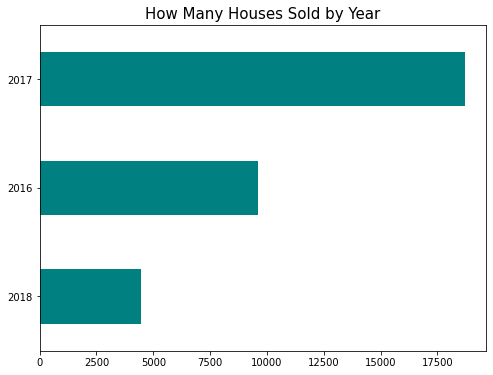

In [525]:
plt.figure(figsize=(8, 6))
df2.Year.value_counts()[::-1].plot(kind='barh', color='teal')
plt.title('How Many Houses Sold by Year', fontsize=15);

## 2.9 Distance

### 2.91 Value Counts

In [526]:
df2.Distance.value_counts()

11.20    1296
13.80     640
10.50     599
7.80      586
9.20      584
         ... 
33.00       1
22.90       1
31.40       1
30.60       1
32.60       1
Name: Distance, Length: 215, dtype: int64

### 2.92 Remove Null Values

In [527]:
df2.Distance.isnull().sum(axis=0)

1

In [528]:
df2 = df2.dropna(subset=['Distance'])

In [529]:
df2.Distance.isnull().sum(axis=0)

0

### 2.93 Extract per 10 KM Distance

In [530]:
df2['10_km'] = df2.Distance.apply(lambda x: 1 if 0<=x<=10 else 0)

In [531]:
df2['20_km'] = df2.Distance.apply(lambda x: 1 if 10 < x<=20 else 0)
df2['30_km'] = df2.Distance.apply(lambda x: 1 if 20 < x<=30 else 0)
df2['40_km'] = df2.Distance.apply(lambda x: 1 if 30 < x<=40 else 0)
df2['50_km'] = df2.Distance.apply(lambda x: 1 if 40 < x<=50 else 0)

In [532]:
df2[:2]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,Year,10_km,20_km,30_km,40_km,50_km
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-04-03,2.50,3067.00,...,-37.81,144.99,Northern Metropolitan,4019.00,2017,1,0,0,0,0
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,2017-04-03,2.50,3067.00,...,-37.80,145.00,Northern Metropolitan,4019.00,2017,1,0,0,0,0


### 2.94 Correlation with Price

#### Heatmap

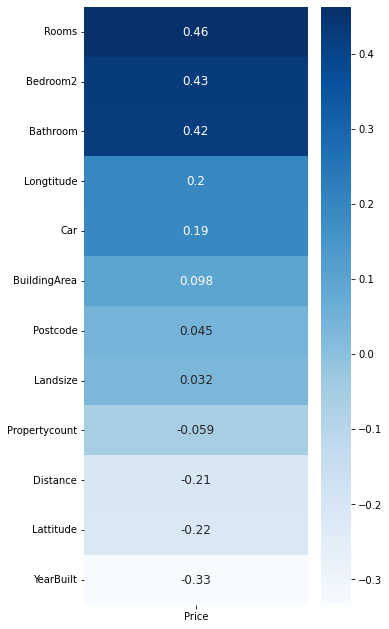

In [533]:
plt.figure(figsize=(5, 11))
sns.heatmap(pd.DataFrame(data={'Price': df.corr().loc['Price']}).sort_values(ascending=False, by='Price')[1:], cmap='Blues', annot=True, annot_kws={'size':12});

#### Horizontal Bar

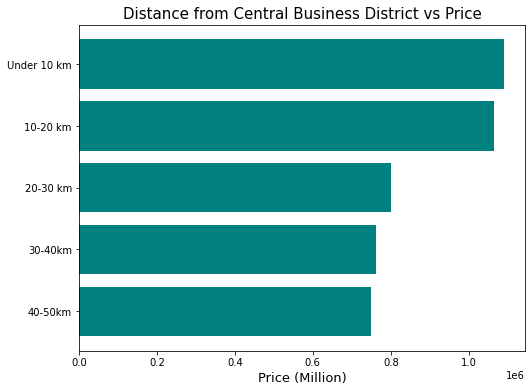

In [534]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(['Under 10 km', '10-20 km', '20-30 km', '30-40km', '40-50km'], [df2.Price[df2['10_km']].mean(), df2.Price[df2['20_km']].mean(), df2.Price[df2['30_km']].mean(), df2.Price[df2['40_km']].mean(), df2.Price[df2['50_km']].mean()], color='teal')
ax.invert_yaxis()
ax.set_title('Distance from Central Business District vs Price', fontsize=15)
ax.set_xlabel('Price (Million)', fontsize=13);

### 2.95 Plot Statistics

#### Histogram

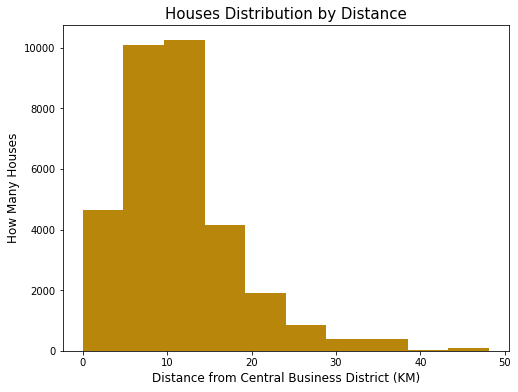

In [535]:
df2.Distance.plot(kind='hist', color='darkgoldenrod', figsize=(8, 6))
plt.xlabel('Distance from Central Business District (KM)', fontsize=12)
plt.ylabel('How Many Houses', fontsize=12)
plt.title('Houses Distribution by Distance', fontsize=15);

## 2.10 Postcode

### 2.101 Value Counts

In [536]:
df2.Postcode.value_counts()

3073.00    844
3046.00    636
3020.00    614
3121.00    594
3165.00    577
          ... 
3793.00      1
3775.00      1
3139.00      1
3788.00      1
3159.00      1
Name: Postcode, Length: 211, dtype: int64

In [537]:
df2.Distance.isnull().sum(axis=0)

0

### 2.102 Correlation with Price

#### Heatmap

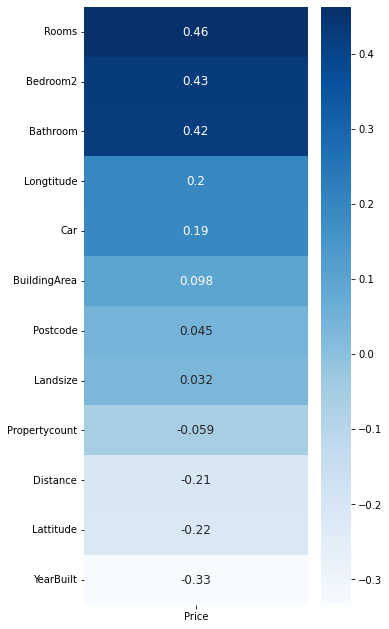

In [538]:
plt.figure(figsize=(5, 11))
sns.heatmap(pd.DataFrame(data={'Price': df.corr().loc['Price']}).sort_values(ascending=False, by='Price')[1:], cmap='Blues', annot=True, annot_kws={'size':12});

#### Scatter Plot (Analysis the Postcode with Q3 of Price (Expensive) and Q1 (Cheap))

In [539]:
np.percentile(df2.Price, q=25)

670000.0

In [540]:
np.percentile(df2.Price, q=75)

1124358.0382089552

In [541]:
df2.Postcode[df2.Price < 680000.0].value_counts().iloc[:3] # Below Q1 (Cheap)

3073.00    362
3020.00    301
3046.00    273
Name: Postcode, dtype: int64

In [542]:
df2.Postcode[df2.Price > 1050000.0].value_counts().iloc[:3] # Upper Q3 (Expensive)

3165.00    330
3204.00    296
3104.00    262
Name: Postcode, dtype: int64

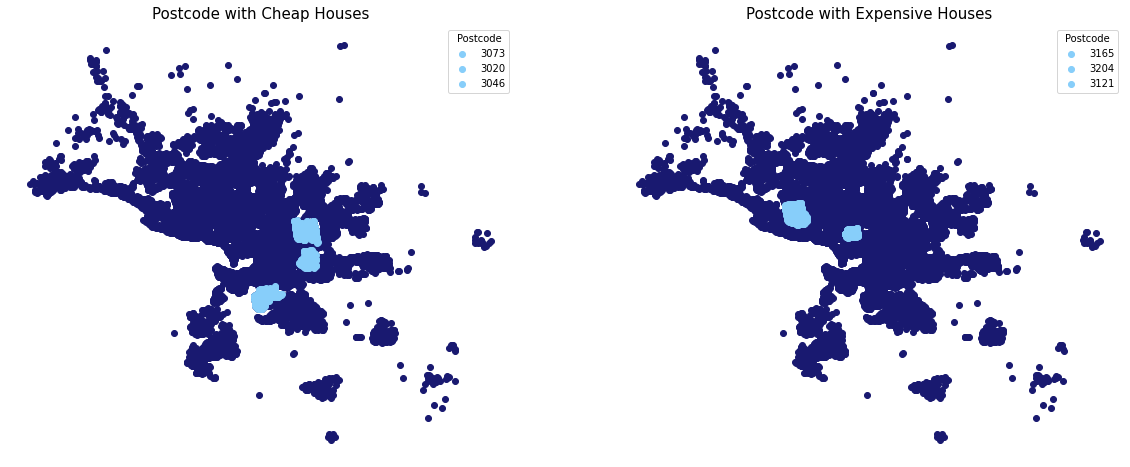

In [543]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax1.scatter(df2.Lattitude[df2.Postcode == 3073], df2.Longtitude[df2.Postcode == 3073], color='lightskyblue', label='3073')
ax1.scatter(df2.Lattitude[df2.Postcode == 3020], df2.Longtitude[df2.Postcode == 3020], color='lightskyblue', label='3020')
ax1.scatter(df2.Lattitude[df2.Postcode == 3046], df2.Longtitude[df2.Postcode == 3046], color='lightskyblue', label='3046')
ax1.legend(title='Postcode')
ax1.axis('off')
ax1.set_title('Postcode with Cheap Houses', fontsize=15)

ax2.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax2.scatter(df2.Lattitude[df2.Postcode == 3165], df2.Longtitude[df2.Postcode == 3165], color='lightskyblue', label='3165')
ax2.scatter(df2.Lattitude[df2.Postcode == 3204], df2.Longtitude[df2.Postcode == 3204], color='lightskyblue', label='3204')
ax2.scatter(df2.Lattitude[df2.Postcode == 3121], df2.Longtitude[df2.Postcode == 3121], color='lightskyblue', label='3121')
ax2.legend(title='Postcode')
ax2.axis('off')
ax2.set_title('Postcode with Expensive Houses', fontsize=15);

## 2.11 Bedrooms

### 2.111 Value Counts

In [544]:
df2.Bedroom2.value_counts()

3.00     11461
2.00      5736
4.00      5587
5.00      1089
1.00       961
0.00        16
6.00         3
9.00         2
10.00        2
20.00        1
8.00         1
7.00         1
30.00        1
Name: Bedroom2, dtype: int64

### 2.112 Extract Most Important Features

In [545]:
b_null = df2[df2.Bedroom2.isnull()]

In [546]:
b3 = df2[df2.Bedroom2 == 3]
b2 = df2[df2.Bedroom2 == 2]
b4 = df2[df2.Bedroom2 == 4]
b5 = df2[df2.Bedroom2 == 5]
b1 = df2[df2.Bedroom2 == 1]

In [547]:
df2 = b3.append((b2, b4, b5, b1, b_null))

In [548]:
df2.Bedroom2.value_counts()

3.00    11461
2.00     5736
4.00     5587
5.00     1089
1.00      961
Name: Bedroom2, dtype: int64

In [549]:
df2.Bedroom2.isnull().sum()

7918

### 2.113 Input Missing Values

#### Input Values Using Mode

In [551]:
df2.Rooms.value_counts()

3    14601
2     8280
4     7058
1     1474
5     1339
Name: Rooms, dtype: int64

In [558]:
df2.Bedroom2[df2.Rooms == 5].value_counts()

5.00    1059
4.00      49
3.00      17
2.00       2
Name: Bedroom2, dtype: int64

In [560]:
# fungsi untuk mengisi "bedrooms" kosong
def impute_bedrooms(cols):
    Bedrooms = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Bedrooms):
        if Rooms == 1:
            return 1
        elif Rooms == 2:
            return 2
        elif Rooms == 3:
            return 3
        elif Rooms == 4:
            return 4
        elif Rooms == 5:
            return 5
        
    else:
        return Bedrooms

In [562]:
df2['Bedroom2'] = df2[['Bedroom2','Rooms']].apply(impute_bedrooms,axis=1)

In [564]:
df2.Bedroom2.isnull().sum()

0

### 2.114 Plot Distributions

#### Horizontal Bar Plot

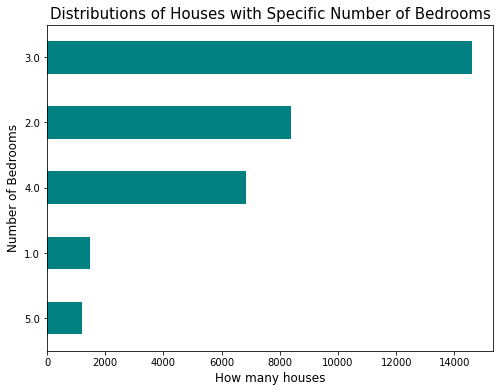

In [589]:
plt.figure(figsize=(8, 6))
df2.Bedroom2.value_counts()[::-1].plot(kind='barh', color='teal')
plt.xlabel('How many houses', fontsize=12)
plt.ylabel('Number of Bedrooms', fontsize=12)
plt.title('Distributions of Houses with Specific Number of Bedrooms', fontsize=15);

## 2.12 Bathrooms

### 2.121 Value Counts

In [566]:
df2.Bathroom.value_counts()

1.00    12754
2.00    10227
3.00     1631
4.00      133
5.00       41
0.00       38
6.00        2
7.00        1
Name: Bathroom, dtype: int64

### 2.122 Extract Most Important Features

In [568]:
bth_1 = df2[df2.Bathroom == 1]
bth_2 = df2[df2.Bathroom == 2]
bth_3 = df2[df2.Bathroom == 3]
bth_null = df2[df2.Bathroom.isnull()]

df2 = bth_1.append((bth_2, bth_3, bth_null))

In [569]:
df2.Bathroom.isnull().sum()

7925

### 2.123 Input Missing Values

In [570]:
df2.Rooms.value_counts()

3    14581
2     8260
4     6985
1     1473
5     1238
Name: Rooms, dtype: int64

#### Input Missing Values Using Mode

In [584]:
df2.Bathroom[df2.Rooms == 1].value_counts()

1.00    942
2.00      7
Name: Bathroom, dtype: int64

In [585]:
# fungsi untuk mengisi "bathrooms" kosong
def impute_bathrooms(cols):
    Bathrooms = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Bathrooms):
        if (Rooms == 1) or (Rooms == 2) or (Rooms == 3):
            return 1
        elif (Rooms == 4) or (Rooms == 5):
            return 2
        
    else:
        return Bathrooms

In [586]:
df2['Bathroom'] = df2[['Bathroom','Rooms']].apply(impute_bathrooms,axis=1)

In [587]:
df2.Bathroom.isnull().sum(axis=0)

0

### 2.124 Plot Distributions

#### Horizontal Bar Plot

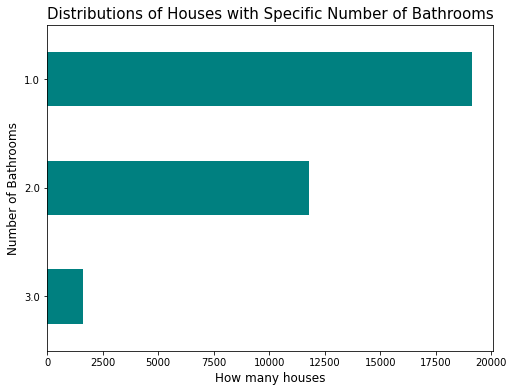

In [590]:
plt.figure(figsize=(8, 6))
df2.Bathroom.value_counts()[::-1].plot(kind='barh', color='teal')
plt.xlabel('How many houses', fontsize=12)
plt.ylabel('Number of Bathrooms', fontsize=12)
plt.title('Distributions of Houses with Specific Number of Bathrooms', fontsize=15);

## 2.13 Car (Car Pot)

### 2.131 Value Counts

In [591]:
df2.Car.value_counts()

2.00     11076
1.00      8910
0.00      1516
3.00      1366
4.00       973
5.00       127
6.00       120
8.00        19
7.00        17
10.00        5
11.00        2
9.00         2
18.00        1
26.00        1
Name: Car, dtype: int64

### 2.132 Extract Most Important Features

In [593]:
c2 = df2[df2.Car == 2]
c1 = df2[df2.Car == 1]
c0 = df2[df2.Car == 0]
c3 = df2[df2.Car == 3]
c4 = df2[df2.Car == 4]
c_null = df2[df2.Car.isnull()]

df2 = c2.append((c1, c0, c3, c4, c_null))

In [595]:
df2.Car.value_counts()

2.00    11076
1.00     8910
0.00     1516
3.00     1366
4.00      973
Name: Car, dtype: int64

In [594]:
df2.Car.isnull().sum()

8402

### 2.133 Input Missing Values

In [596]:
df2.Rooms.value_counts()

3    14465
2     8249
4     6868
1     1472
5     1189
Name: Rooms, dtype: int64

#### Input Missing Values with Mode

In [606]:
df2.Car[df2.Rooms == 3].value_counts()

2.00    5658
1.00    3621
3.00     700
0.00     626
4.00     451
Name: Car, dtype: int64

In [607]:
# fungsi untuk mengisi "cars" kosong
def impute_cars(cols):
    Cars = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Cars):
        if (Rooms == 1) or (Rooms == 2):
            return 1
        elif (Rooms == 3) or (Rooms == 4) or (Rooms == 5):
            return 2
        
    else:
        return Cars

In [608]:
df2['Car'] = df2[['Car','Rooms']].apply(impute_cars,axis=1)

In [609]:
df2.Car.isnull().sum(axis=0)

0

### 2.134 Plot Distributions

#### Horizontal Bar Plot

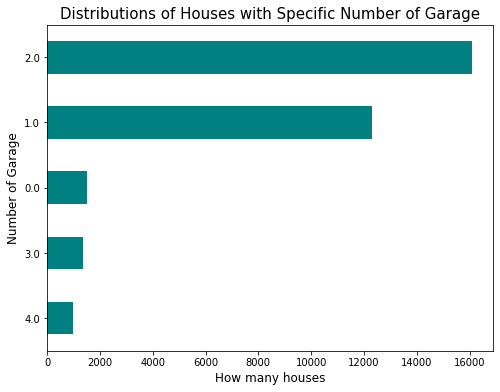

In [611]:
plt.figure(figsize=(8, 6))
df2.Car.value_counts()[::-1].plot(kind='barh', color='teal')
plt.xlabel('How many houses', fontsize=12)
plt.ylabel('Number of Garage', fontsize=12)
plt.title('Distributions of Houses with Specific Number of Garage', fontsize=15);

## 2.14 Landsize

### 2.141 Value Counts

In [613]:
df2.Landsize.value_counts()

0.00       2387
650.00      174
697.00      106
585.00       90
604.00       79
           ... 
2886.00       1
2120.00       1
1140.00       1
1233.00       1
1974.00       1
Name: Landsize, Length: 1580, dtype: int64

### 2.142 Input Missing Values

In [617]:
df2.Rooms.value_counts()

3    14465
2     8249
4     6868
1     1472
5     1189
Name: Rooms, dtype: int64

#### Input Missing Values with Mean

In [622]:
df2.Landsize[df2.Rooms == 5].mean()

823.7067938021454

In [623]:
# fungsi untuk mengisi "landsize" kosong
def impute_landsize(cols):
    Landsizes = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Landsizes):
        if (Rooms == 1):
            return 399.6270396270396
        elif (Rooms == 2):
            return 430.59979550102247
        elif (Rooms == 3):
            return 538.5868220251598
        elif Rooms == 4:
            return 699.1730199068191
        elif Rooms == 5:
            return 823.7067938021454
  
    else:
        return Landsizes

In [624]:
df2['Landsize'] = df2[['Landsize','Rooms']].apply(impute_landsize,axis=1)

In [625]:
df2.Landsize.isnull().sum(axis=0)

0

## 2.15 Building Area

### 2.151 Value Counts

In [637]:
df2.BuildingArea.value_counts()

120.00    179
100.00    159
110.00    157
130.00    148
115.00    144
         ... 
182.85      1
186.75      1
227.60      1
735.00      1
697.00      1
Name: BuildingArea, Length: 660, dtype: int64

### 2.152 Input Missing Values

In [638]:
df2.Rooms.value_counts()

3    14465
2     8249
4     6868
1     1472
5     1189
Name: Rooms, dtype: int64

#### Input Missing Values with Mean

In [644]:
df2.BuildingArea[df2.Rooms == 5].mean()

254.86295847750867

In [645]:
# fungsi untuk mengisi "building area" kosong
def impute_buildingarea(cols):
    BuildingAreas = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(BuildingAreas):
        if (Rooms == 1):
            return 54.060790020790016
        elif (Rooms == 2):
            return 92.75892086330936
        elif (Rooms == 3):
            return 137.8532513590844
        elif Rooms == 4:
            return 204.062779366634
        elif Rooms == 5:
            return 254.86295847750867    
        
    else:
        return BuildingAreas

In [646]:
df2['BuildingArea'] = df2[['BuildingArea','Rooms']].apply(impute_buildingarea,axis=1)

In [647]:
df2.BuildingArea.isnull().sum(axis=0)

0

## 2.16 Year Built

### 2.161 Value Counts

In [649]:
df2.YearBuilt.value_counts()

1970.00    1432
1960.00    1205
1950.00    1022
1980.00     681
1900.00     549
           ... 
1893.00       1
1876.00       1
2106.00       1
1879.00       1
1855.00       1
Name: YearBuilt, Length: 152, dtype: int64

### 2.162 Input Missing Values

In [650]:
df2.Rooms.value_counts()

3    14465
2     8249
4     6868
1     1472
5     1189
Name: Rooms, dtype: int64

#### Input Missing Values with Mean

In [656]:
np.round(df2.YearBuilt[df2.Rooms == 5].mean())

1968.0

In [657]:
# fungsi untuk mengisi "year built" kosong
def impute_yearbuilt(cols):
    YearBuilts = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(YearBuilts):
        if (Rooms == 1):
            return 1976.0
        elif (Rooms == 2):
            return 1966.0
        elif (Rooms == 3):
            return 1964.0
        elif (Rooms == 4):
            return 1969.0
        elif (Rooms == 5):
            return 1968.0

    else:
        return YearBuilts

In [658]:
df2['YearBuilt'] = df2[['YearBuilt','Rooms']].apply(impute_yearbuilt,axis=1)

In [659]:
df2.YearBuilt.isnull().sum(axis=0)

0

## 2.17 Lattitude 

### 2.171 Value Counts

In [660]:
df2.Lattitude.value_counts()

-37.84    23
-37.84    21
-37.82    19
-37.80    18
-37.84    18
          ..
-37.76     1
-37.86     1
-37.86     1
-37.88     1
-37.84     1
Name: Lattitude, Length: 12620, dtype: int64

### 2.172 Input Missing Values

In [661]:
df2.Rooms.value_counts()

3    14465
2     8249
4     6868
1     1472
5     1189
Name: Rooms, dtype: int64

#### Input Missing Values with Mean

In [666]:
df2.Lattitude[df2.Rooms == 5].mean()

-37.81527194274028

In [667]:
# fungsi untuk mengisi "lattitude and longtitude" kosong
def impute_lat(cols):
    Lat = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Lat):
        if Rooms == 1:
            return -37.82363810362695
        elif Rooms == 2:
            return -37.81389564356436
        elif Rooms == 3:
            return -37.80450202778754
        elif Rooms == 4:
            return -37.807535890681
        elif Rooms == 5:
            return -37.81527194274028

    else:
        return Lat

In [668]:
df2['Lattitude'] = df2[['Lattitude','Rooms']].apply(impute_lat,axis=1)

In [669]:
df2.Lattitude.isnull().sum(axis=0)

0

## 2.18 Longtitude

### 2.181 Value Counts

In [670]:
df2.Longtitude.value_counts()

145.00    20
145.00    16
144.99    16
145.01    15
145.01    15
          ..
144.99     1
145.14     1
145.14     1
145.17     1
145.04     1
Name: Longtitude, Length: 13707, dtype: int64

### 2.182 Input Missing Values

In [671]:
df2.Rooms.value_counts()

3    14465
2     8249
4     6868
1     1472
5     1189
Name: Rooms, dtype: int64

#### Input Missing Values with Mean

In [676]:
df2.Longtitude[df2.Rooms == 5].mean()

145.03750446830264

In [677]:
def impute_lng(cols):
    Lng = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Lng):
        if Rooms == 1:
            return 144.9854236683938
        elif Rooms == 2:
            return 144.99181057107498
        elif Rooms == 3:
            return 144.99403389992966
        elif Rooms == 4:
            return 145.01549381003585
        elif Rooms == 5:
            return 145.03750446830264

    else:
        return Lng

In [678]:
df2['Longtitude'] = df2[['Longtitude','Rooms']].apply(impute_lng,axis=1)

In [679]:
df2.Longtitude.isnull().sum(axis=0)

0

### 2.19 Council Area, Region Name, and Property Count

In [681]:
df2.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      2
Lattitude        0
Longtitude       0
Regionname       2
Propertycount    2
Year             0
10_km            0
20_km            0
30_km            0
40_km            0
50_km            0
dtype: int64

In [682]:
df2 = df2.dropna(subset=['CouncilArea', 'Regionname', 'Propertycount'])

In [683]:
df2.isnull().sum(axis=0)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Year             0
10_km            0
20_km            0
30_km            0
40_km            0
50_km            0
dtype: int64

## 2.20 Create a model

In [722]:
df2_for_ml = df2[['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year']]

In [723]:
df2_for_ml.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
100,Airport West,3,h,830000.00,S,Barry,13.50,3042.00,3.00,1.00,2.00,971.00,113.00,1960.00,Moonee Valley City Council,-37.72,144.88,Western Metropolitan,3464.00,2016
119,Airport West,3,h,662000.00,S,Brad,13.50,3042.00,3.00,1.00,2.00,612.00,137.85,1964.00,Moonee Valley City Council,-37.72,144.88,Western Metropolitan,3464.00,2016
210,Alphington,3,h,1540000.00,S,Nelson,6.40,3078.00,3.00,1.00,2.00,592.00,137.85,1964.00,Darebin City Council,-37.78,145.03,Northern Metropolitan,2211.00,2016
224,Alphington,3,h,1165000.00,S,Barry,6.40,3078.00,3.00,1.00,2.00,979.00,137.85,1964.00,Darebin City Council,-37.78,145.03,Northern Metropolitan,2211.00,2016
233,Altona,3,h,1120000.00,S,Barlow,13.80,3018.00,3.00,1.00,2.00,506.00,120.00,1930.00,Hobsons Bay City Council,-37.87,144.84,Western Metropolitan,5301.00,2017


### 2.201 Convert String Into Numeric

In [724]:
df2_for_ml['Suburb'] = pd.Categorical(df2_for_ml['Suburb'])
df2_for_ml['Type'] = pd.Categorical(df2_for_ml['Type'])
df2_for_ml['Method'] = pd.Categorical(df2_for_ml['Method'])
df2_for_ml['CouncilArea'] = pd.Categorical(df2_for_ml['CouncilArea'])
df2_for_ml['Regionname'] = pd.Categorical(df2_for_ml['Regionname'])
df2_for_ml['SellerG'] = pd.Categorical(df2_for_ml['SellerG'])


df2_for_ml['SellerG'] = df2_for_ml['SellerG'].cat.codes
df2_for_ml['Regionname'] = df2_for_ml['Regionname'].cat.codes
df2_for_ml['CouncilArea'] = df2_for_ml['CouncilArea'].cat.codes
df2_for_ml['Type'] = df2_for_ml['Type'].cat.codes
df2_for_ml['Method'] = df2_for_ml['Method'].cat.codes
df2_for_ml['Suburb'] = df2_for_ml['Suburb'].cat.codes

C:\Users\Acer\AppData\Local\Temp/ipykernel_16120/1933068508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_for_ml['Suburb'] = pd.Categorical(df2_for_ml['Suburb'])
C:\Users\Acer\AppData\Local\Temp/ipykernel_16120/1933068508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_for_ml['Type'] = pd.Categorical(df2_for_ml['Type'])
C:\Users\Acer\AppData\Local\Temp/ipykernel_16120/1933068508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [725]:
df2_for_ml.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
100,2,3,0,830000.00,2,23,13.50,3042.00,3.00,1.00,2.00,971.00,113.00,1960.00,22,-37.72,144.88,6,3464.00,2016
119,2,3,0,662000.00,2,41,13.50,3042.00,3.00,1.00,2.00,612.00,137.85,1964.00,22,-37.72,144.88,6,3464.00,2016
210,6,3,0,1540000.00,2,222,6.40,3078.00,3.00,1.00,2.00,592.00,137.85,1964.00,6,-37.78,145.03,2,2211.00,2016
224,6,3,0,1165000.00,2,23,6.40,3078.00,3.00,1.00,2.00,979.00,137.85,1964.00,6,-37.78,145.03,2,2211.00,2016
233,7,3,0,1120000.00,2,22,13.80,3018.00,3.00,1.00,2.00,506.00,120.00,1930.00,10,-37.87,144.84,6,5301.00,2017


### 2.202 Split Train Test Data

#### Model 1

In [726]:
X = df2_for_ml.drop(['Price'], axis=1)
y = df2_for_ml['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [727]:
# Set random seed
np.random.seed(42)

# Create model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
model.score(X_test, y_test)

0.6802923303881828

In [728]:
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

146662.84684557666

#### Model 2 (Fine-Tuned)

In [141]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [142]:
param = {'n_estimators':[x for x in np.arange(200, 2000, 200)], 
         'max_features':['auto', 'sqrt'],
         'max_depth':[x for x in np.arange(10, 100, 10)],
         'min_samples_split':[x for x in np.arange(2, 10, 2)],
         'min_samples_leaf':[x for x in np.arange(1, 5, 1)]}

In [143]:
model_2 = RandomizedSearchCV(estimator=RandomForestRegressor(),
                             param_distributions=param,
                             n_iter=10,
                             verbose=2)

In [144]:
model_2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  52.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  54.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  54.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  53.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=  52.5s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  39.4s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 1.4min
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   verbose=2)

In [145]:
model_2.score(X_test, y_test)

0.6873224782117269

#### Model 3 (Use Best Estimator)

In [146]:
model_2.best_estimator_

RandomForestRegressor(max_depth=60, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=1000)

In [696]:
# Set random seed
np.random.seed(42)

# Create model
model_3 = RandomForestRegressor(max_depth=60, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=1000)

# Fit the model
model_3.fit(X_train, y_train)

# Evaluate the model
model_3.score(X_test, y_test)

0.692676109539125

In [697]:
pred = model_3.predict(X_test)
mean_absolute_error(y_test, pred)

144744.6302517759

#### Model 4 (Use Scaled Data)

In [731]:
X_train[:2]

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
31850,173,2,2,2,222,7.80,3079.00,2.00,1.00,1.00,430.60,92.76,1966.00,0,-37.81,144.99,0,1554.00,2018
134,4,2,0,2,322,3.30,3206.00,2.00,1.00,0.00,159.00,92.76,1966.00,26,-37.84,144.95,5,3280.00,2016


In [732]:
from sklearn.preprocessing import StandardScaler

In [733]:
scaler = StandardScaler()

In [734]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [736]:
X_train[0]

array([ 0.03485644, -1.05534448,  1.73741732, -0.36208601,  0.37853567,
       -0.5126055 , -0.32277905, -1.04600555, -0.78032718, -0.81251912,
       -0.07982521, -0.63685089, -0.01452396, -1.41176694, -0.06343453,
       -0.07080264, -1.74812925, -1.34056269,  1.817824  ])

In [737]:
X_test[0]

array([ 0.44108631,  0.06530457, -0.66676035, -0.36208601,  0.81812851,
        2.13110749,  5.79530511,  0.07791443, -0.78032718, -0.81251912,
        0.07147248, -0.34259775,  0.78116478,  1.53216637,  2.7366863 ,
        0.98594829, -0.78035253, -0.38967534,  0.25032988])

In [705]:
# Set random seed
np.random.seed(42)

# Create model
model_4 = RandomForestRegressor(max_depth=60, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=1000)

# Fit the model
model_4.fit(X_train, y_train)

# Evaluate the model
model_4.score(X_test, y_test)

0.6924760824686289

In [706]:
pred = model_4.predict(X_test)
mean_absolute_error(y_test, pred)

144798.88010522802